In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
import ast


In [16]:


# Define the path to the directory containing the CSV files
data_dir = Path("C:/Users/Qazi Fabia Hoq/OneDrive/Documents/GitHub/netflix-rating-project/resources")

# Read the showData.csv file into a DataFrame
show_data_path = data_dir / "showData.csv"
show_data = pd.read_csv(show_data_path)

# Display the first few rows of the DataFrame to verify that it was read correctly
show_data.head()



,Unnamed: 0,id,title,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score
0,0,ts300399,Five Came Back: The Reference Films,1945,TV-MA,51,['documentation'],['US'],1.0,NaN
1,1,ts22164,Monty Python's Flying Circus,1969,TV-14,30,"['comedy', 'european']",['GB'],4.0,8.8
2,2,ts45948,Monty Python's Fliegender Zirkus,1972,TV-MA,43,['comedy'],[],1.0,8.1
3,3,ts20681,Seinfeld,1989,TV-PG,24,['comedy'],['US'],9.0,8.9
4,4,ts22082,Knight Rider,1982,TV-PG,51,"['scifi', 'action', 'crime', 'drama']",['US'],4.0,6.9


In [17]:
# Read the movieData.csv file into a DataFrame
movie_data_path = data_dir / "movieData.csv"
movie_data = pd.read_csv(movie_data_path)

# Display the first few rows of the DataFrame to verify that it was read correctly
movie_data.head()


,Unnamed: 0,id,title,release_year,age_certification,runtime,genres,production_countries,imdb_score
0,0,tm84618,Taxi Driver,1976,R,114,"['drama', 'crime']",['US'],8.2
1,1,tm154986,Deliverance,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],7.7
2,2,tm127384,Monty Python and the Holy Grail,1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],8.2
3,3,tm120801,The Dirty Dozen,1967,NaN,150,"['war', 'action']","['GB', 'US']",7.7
4,4,tm70993,Life of Brian,1979,R,94,['comedy'],['GB'],8.0


In [18]:
# Check for null values in show_data DataFrame
print("Null values in show_data:")
print(show_data.isnull().sum())

# Check for null values in movie_data DataFrame
print("\nNull values in movie_data:")
print(movie_data.isnull().sum())

# Drop rows with NaN values in both DataFrames
show_data.dropna(inplace=True)
movie_data.dropna(inplace=True)

# Verify that NaN values are removed
print("\nAfter dropping NaN values:")
print("Null values in show_data:")
print(show_data.isnull().sum())
print("\nNull values in movie_data:")
print(movie_data.isnull().sum())


Null values in show_data:
Unnamed: 0                0
id                        0
title                     0
release_year              0
age_certification       255
runtime                   0
genres                    0
production_countries      0
seasons                   0
imdb_score              167
dtype: int64

Null values in movie_data:
Unnamed: 0                 0
id                         0
title                      1
release_year               0
age_certification       2364
runtime                    0
genres                     0
production_countries       0
imdb_score               315
dtype: int64

After dropping NaN values:
Null values in show_data:
Unnamed: 0              0
id                      0
title                   0
release_year            0
age_certification       0
runtime                 0
genres                  0
production_countries    0
seasons                 0
imdb_score              0
dtype: int64

Null values in movie_data:
Unnamed: 0              

 # What is the distribution of IMDb scores among TV shows and movies in the dataset?


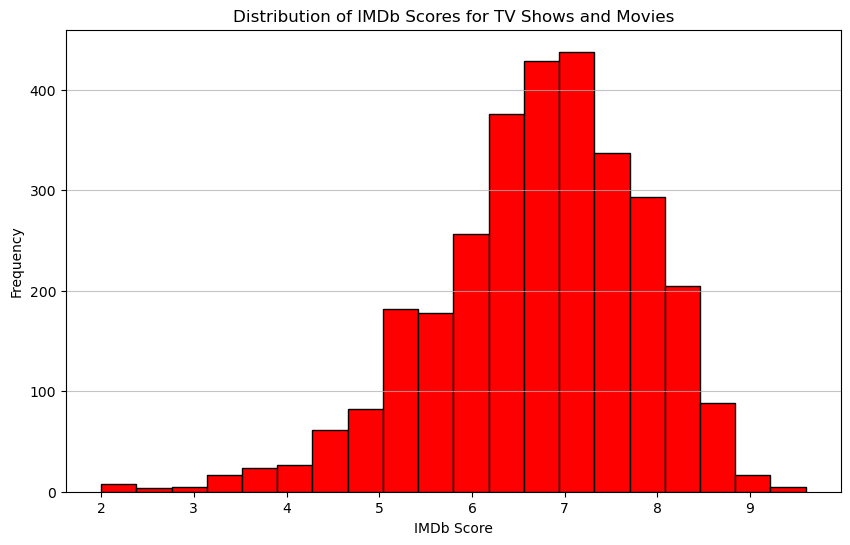

In [19]:


# Combine the IMDb scores from both datasets
imdb_scores = pd.concat([show_data['imdb_score'].dropna(), movie_data['imdb_score'].dropna()])

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(imdb_scores, bins=20, color='red', edgecolor='black')
plt.xlabel('IMDb Score')
plt.ylabel('Frequency')
plt.title('Distribution of IMDb Scores for TV Shows and Movies')
plt.grid(axis='y', alpha=0.75)
plt.show()


## Analysis

From the histogram, we can observe that the most common IMDb scores for both TV shows and movies on Netflix are around 7.2, as they have the highest frequency. This indicates that a significant number of titles in the Netflix dataset have IMDb scores around 7.2.

Additionally, we can see that there are titles with IMDb scores as low as 2.5 and as high as 9.5, although these are less frequent compared to scores around 7.2. This suggests that while there are titles with lower and higher IMDb scores on Netflix, the majority fall within the 7.2 range.

Overall, the distribution of IMDb scores in the Netflix dataset indicates that there is a variety of titles with different IMDb ratings, with a notable concentration around the 7.2 mark.

# What is the distribution of age certifications (e.g., PG, R, TV-MA) among TV shows and movies in the dataset?

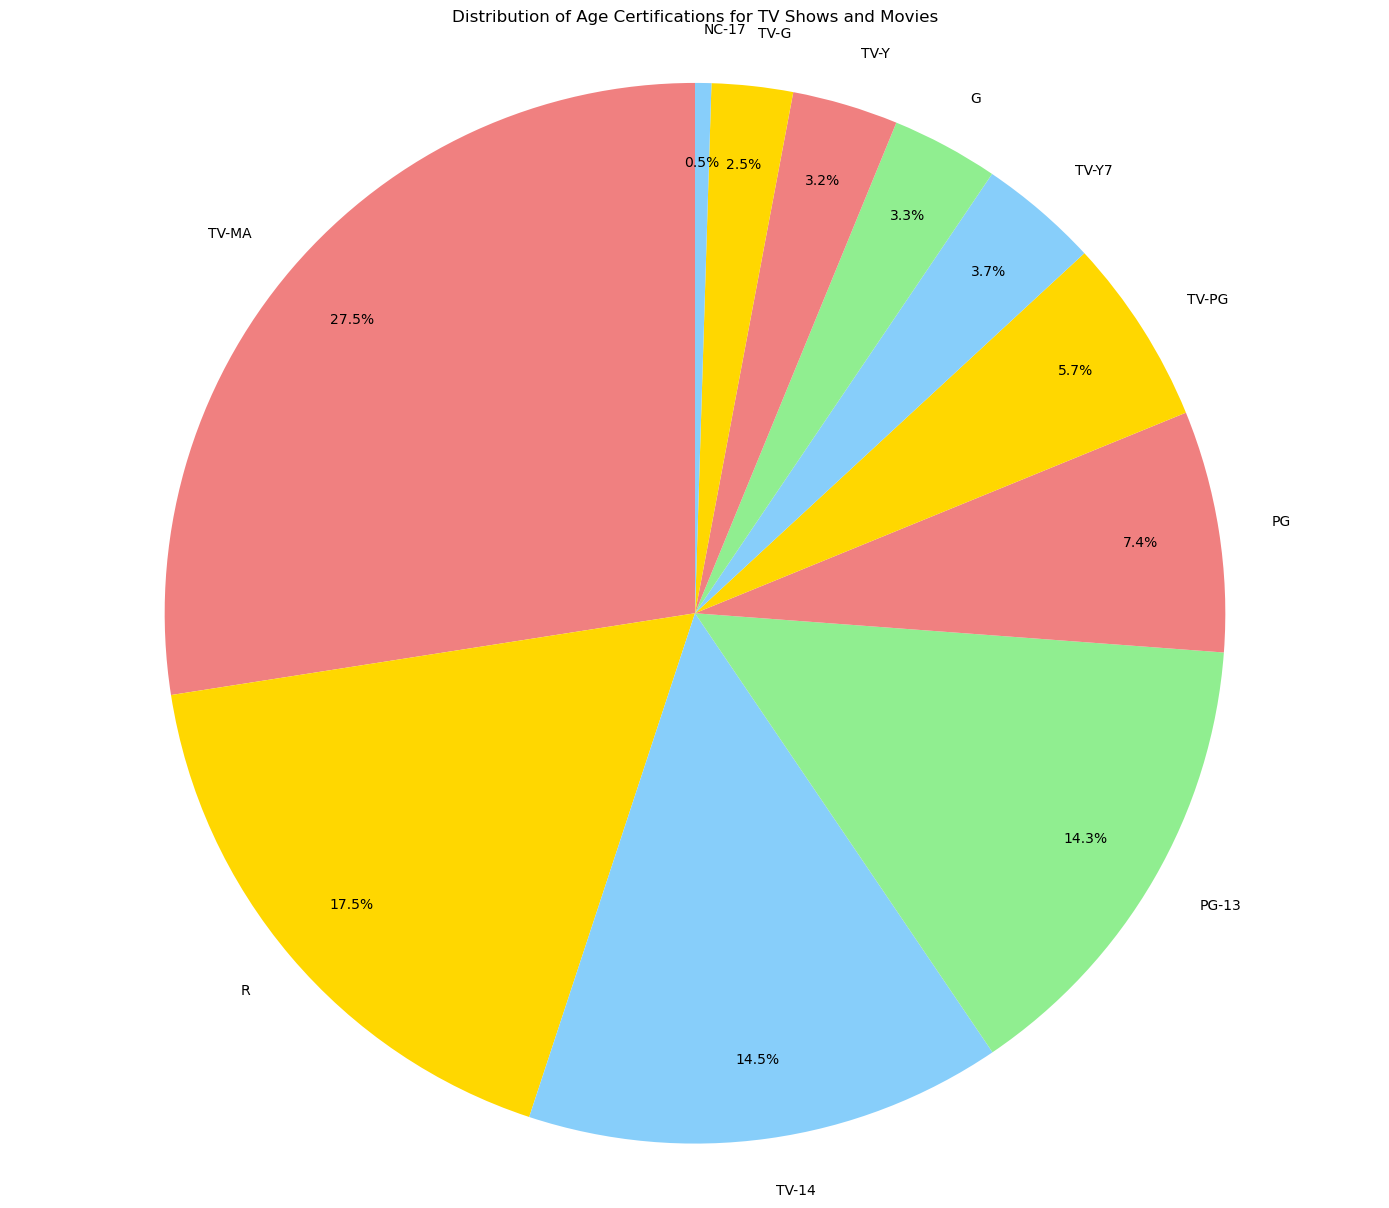

In [20]:


# Combine the age certifications from both datasets
age_certifications = pd.concat([show_data['age_certification'].dropna(), movie_data['age_certification'].dropna()])

# Count the occurrences of each age certification
age_cert_counts = age_certifications.value_counts()

# Plot a pie chart
plt.figure(figsize=(14, 12))
plt.pie(age_cert_counts, labels=age_cert_counts.index, startangle=90, autopct='%1.1f%%', pctdistance=0.85, colors=['lightcoral', 'gold', 'lightskyblue', 'lightgreen'])
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Distribution of Age Certifications for TV Shows and Movies', pad=20)  # Add padding to the title
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


## Analysis
This pie chart illustrates the distribution of age certifications among TV shows and movies in the Netflix dataset. Each slice of the pie represents a different age certification, such as TV-MA, R, TV-14, PG-13, PG, TV-PG, NC-17, and TV-G. The percentages indicate the proportion of titles in the dataset with each age certification.

From the chart, we can see that TV-MA is the most common age certification, accounting for 27.5% of the titles. This is followed by R at 17.5%, TV-14 at 14.5%, PG-13 at 14.3%, and PG at 7.4%. These certifications represent the majority of titles in the dataset.

On the other hand, certifications like NC-17 and TV-G are less common, each accounting for only 0.5% and 2.5% of the titles, respectively.

Overall, the distribution of age certifications indicates that the Netflix dataset contains a variety of content catering to different age groups, with TV-MA being the most prevalent certification.

# What is the genre distribution among TV shows and movies and how has this distribution evolved from 2015-2022?

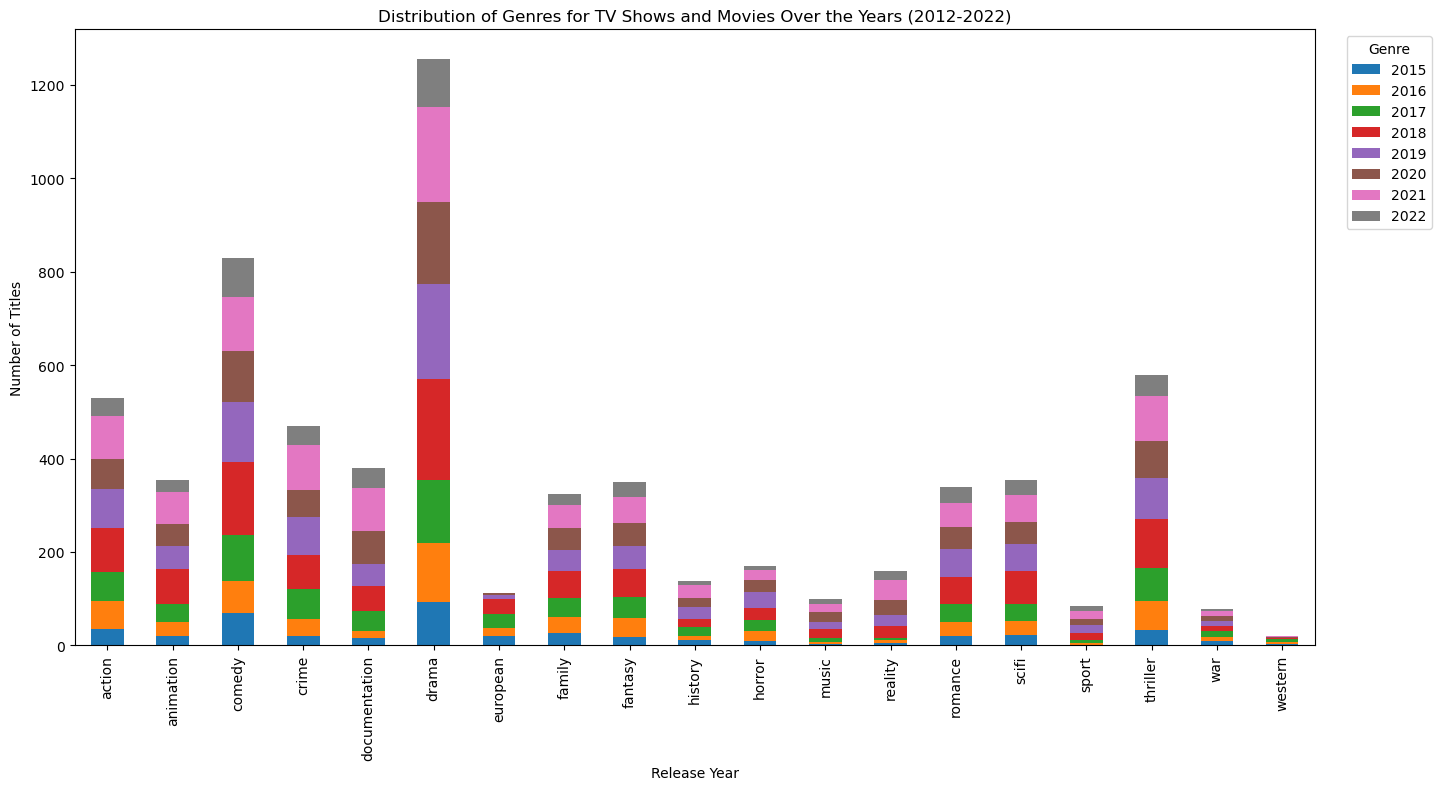

In [14]:
# Filter the genre_data DataFrame for the years 2015 to 2022
genre_data_filtered = genre_data[genre_data['release_year'].between(2015, 2022)]

# Group the filtered data by genre and release year to get the count of each genre released in each year
genre_counts_by_year = genre_data_filtered.groupby(['genres', 'release_year']).size().unstack().fillna(0)

# Plot stacked bar chart
ax = genre_counts_by_year.plot(kind='bar', stacked=True, figsize=(16, 8))
plt.title('Distribution of Genres for TV Shows and Movies Over the Years (2012-2022)')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.legend(title='Genre', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.show()


## Analysis
This analysis explores the genre distribution among TV shows and movies in the Netflix dataset from 2015 to 2022. The stacked bar chart visualizes how the genre distribution has evolved over these years.

From the chart, we can observe that drama is consistently the most common genre, with a relatively stable number of titles released each year. Comedy and thriller also have a significant presence, with noticeable peaks in 2018 and 2022.

Other genres such as action, crime, and adventure also maintain a consistent presence throughout the years. However, some genres like western, war, sports, music, and European films are less common, with western being consistently the least represented genre.

Overall, drama, comedy, thriller, action, and crime are the most prevalent genres in the Netflix dataset, with drama being the most consistently popular genre over the years.





